In [2]:
import re
import os
import cv2
import time
import shutil
import random
import requests
import codecs
import configparser
import numpy as np
from bs4 import BeautifulSoup as BS
from matplotlib import pyplot as plt
from chardet import detect
from pathlib import Path

In [3]:
def _load_config():
    config_path = "./config.ini"
    with open(config_path, "rb") as ef:
        config_encoding = detect(ef.read())["encoding"]
    config = configparser.ConfigParser()
    config.read_file(codecs.open(config_path, "r", config_encoding))
    return config

In [4]:
def _requests_session(config, status_forcelist=(500, 502, 504), session=None):
    session = requests.session()
    headers = {"user-agent": config["Requests_header"]["user-agent"]}
    session.headers.update(headers)
    return session

In [5]:
def mkdirs(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [6]:
config = _load_config()

In [7]:
rs = _requests_session(config)

In [8]:
dir_origin = "./origin"

In [9]:
mkdirs("./origin")

In [10]:
url = "https://webreg.tpech.gov.tw/ValidateCode.aspx"

In [11]:
# i = 0
# while(i < 200):
#     save_path = "./origin/{0:0=3d}.png".format(i)
#     res = rs.get(url, stream=True)
#     if res.status_code == 200:
#         with open(save_path, "wb") as f:
#             for chunk in res.iter_content(1024):
#                 f.write(chunk)
#     i+=1
#     time.sleep(random.uniform(1, 2))

In [12]:
img_list = list(Path(dir_origin).iterdir())

In [13]:
str(img_list[0])

'origin\\000.png'

In [41]:
img_path = img_list[0]

In [42]:
image = cv2.imread(str(img_path))
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# image_r = 225 - image

In [ ]:
# def ero(img):
#     kernel = np.ones((2, 2), np.uint8)
#     return cv2.erode(img, kernel, iterations=1)

In [ ]:
# def dil(img):
#     kernel = np.ones((2, 2), np.uint8)
#     return cv2.dilate(img, kernel, iterations=1)

In [26]:
def mor_open(img):
    kernel = np.ones((2, 2), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

In [27]:
def mor_close(img):
    kernel = np.ones((2, 2), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

In [28]:
# cv2.imwrite("./test.png", image)

In [29]:
def crop_img(img, x, w, y, h):
    return img[y:y+h, x:x+w]

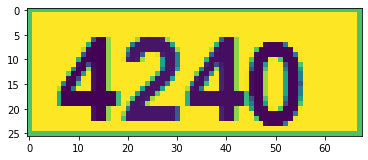

In [43]:
plt.imshow(image)

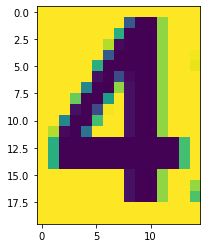

In [44]:
plt.imshow(crop_img(image, 5, 15, 5, 20))

In [45]:
crop_img(image, 5, 15, 5, 20)

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 142,  98,  97, 229, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 196,  98,  98,  97, 229, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 237, 101,  98,  98,  97, 229, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 142,  98,  98,  98,  97, 229, 255,
        255, 252],
       [255, 255, 255, 255, 255, 196,  98,  98,  98,  98,  97, 229, 255,
        255, 250],
       [255, 255, 255, 255, 255, 104,  98, 133, 101,  98,  97, 229, 255,
        255, 255],
       [255, 255, 255, 255, 170,  98,  97, 229, 104,  98,  97, 229, 255,
        255, 255],
       [255, 255, 255, 218,  98,  98, 185, 255, 104,  98,  97, 229, 255,
        255, 255],
       [255, 255, 255, 104,  98, 133, 252, 255, 104,  98,  97, 229, 255,
        255, 255],
       [255, 255, 170,  98,  98, 208, 255, 255, 104,  98,  97, 229, 255,
       

In [22]:
crop_list = []
for img_file in img_list:
    img_path = str(img_file)
    image = cv2.imread(str(img_path))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    crop_list.append(crop_img(image, 5, 15, 5, 20))
    crop_list.append(crop_img(image, 18, 15, 5, 20))
    crop_list.append(crop_img(image, 31, 15, 5, 20))
    crop_list.append(crop_img(image, 43, 15, 5, 20))

In [23]:
len(crop_list)

800

In [24]:
dir_crop = "./crop"
mkdirs(dir_crop)

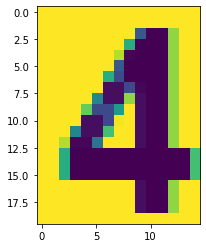

In [30]:
plt.imshow(mor_close(crop_list[0]))

In [33]:
i = 0
for image in crop_list:
    cv2.imwrite("./{}/{}-{}.png".format(dir_crop, i//4, i%4), mor_close(image))
    i+=1

In [34]:
# plt.imshow(image)

In [35]:
# plt.imshow(image[5:25, 5:20])

In [36]:
# plt.imshow(mor_close(image[5:25, 5:20]))

In [37]:
# plt.imshow(mor_close(image[5:25, 18:33]))

In [38]:
# plt.imshow(mor_close(image[5:25, 31:46]))

In [39]:
# plt.imshow(image[5:25, 43:58])

In [40]:
# plt.imshow(mor_close(image[5:25, 43:58]))